# DebugRL Tutorial

In this tutorial, we will see how to use debug_rl through ``GridCraft`` and ``Pendulum`` environments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from debug_rl.envs.gridcraft import GridEnv, spec_from_string, plot_grid_values
from debug_rl.envs.pendulum import Pendulum, plot_pendulum_values, reshape_values
from debug_rl.solvers import OracleViSolver, OracleCviSolver, SamplingFittedViSolver

# Gridcraft examples

In [2]:
# make a environment
maze = spec_from_string("SOOO\\"+
                        "OLLL\\"+
                        "OOOO\\"+
                        "OLRO\\")
T = 50
env = GridEnv(maze, trans_eps=0.0, horizon=T)

In [3]:
# Do Value Iteration
solver = OracleViSolver(env)
values = solver.solve()  # SxA
policy = solver.compute_policy(values)  # SxA
visitation = solver.compute_visitation(policy)  # SxA

 21%|██        | 2062/10000 [00:00<00:00, 17181.34it/s]

OracleViSolver solve_options:
{   'alpha': 0.9,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_interval': 100,
    'seed': 0}
Iteration finished with maximum error:  9.994920446843025e-10


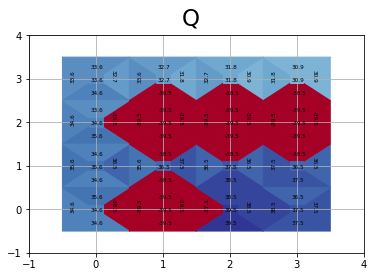

In [4]:
# plot q values 
plot_grid_values(env.gs, solver.compute_action_values(policy), title="Q")

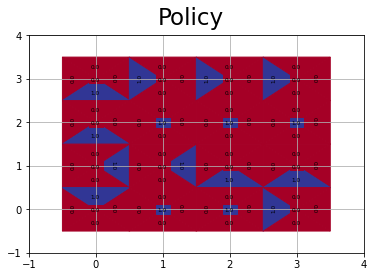

In [5]:
# plot policy
plot_grid_values(env.gs, policy, title="Policy")

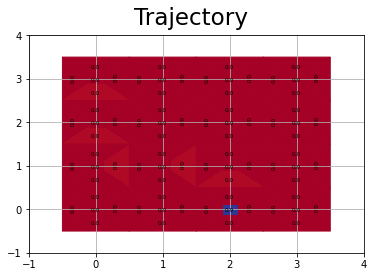

In [6]:
# plot state visitation frequency
plot_grid_values(env.gs, np.sum(visitation, axis=0), title="Trajectory")

In [7]:
# Do Conservative Value Iteration
solver = OracleCviSolver(env)
solver.set_options({"alpha": 0.5})
values = solver.solve()  # SxA
policy = solver.compute_policy(values)  # SxA
visitation = solver.compute_visitation(policy)  # S

 21%|██        | 2074/10000 [00:00<00:00, 9583.38it/s]

OracleCviSolver solve_options:
{   'alpha': 0.9,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_interval': 100,
    'seed': 0}
OracleCviSolver solve_options:
{   'alpha': 0.5,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_interval': 100,
    'seed': 0}


 22%|██▏       | 2158/10000 [00:00<00:00, 10366.83it/s]

Iteration finished with maximum error:  9.933103228831897e-10


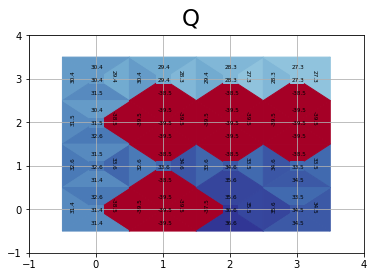

In [8]:
# plot q values
plot_grid_values(env.gs, solver.compute_action_values(policy), title="Q")

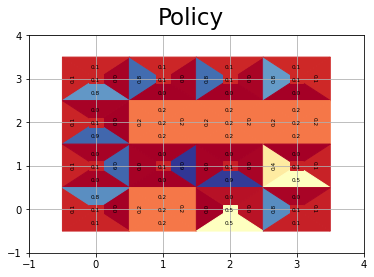

In [9]:
# plot policy 
plot_grid_values(env.gs, policy, title="Policy")

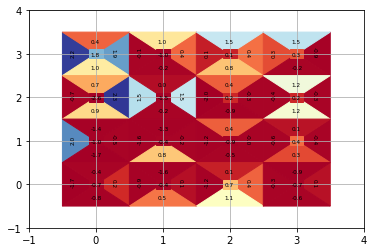

In [10]:
# You can plot any matrix with its shape of SxA
random_values = np.random.randn(*values.shape)
plot_grid_values(env.gs, random_values)

In [11]:
# The plot_grid_values function can return the image as a np.array.
# This is useful for tensorboard.add_image.

image_array = plot_grid_values(env.gs, random_values, return_image=True)
print(image_array.shape)

(3, 288, 432)


# Pendulum

In [12]:
env = Pendulum()

/home/dl-box/anaconda3/envs/debugrl-release/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [13]:
solver = SamplingFittedViSolver(env, solve_options={"num_trains": 3000})
values = solver.solve()
policy = solver.compute_policy(values)
visitation = solver.compute_visitation(policy)

  0%|          | 9/3000 [00:00<00:38, 78.63it/s]

SamplingFittedViSolver solve_options:
{   'activation': 'relu',
    'alpha': 0.9,
    'beta': 1.0,
    'buffer_size': 1000000.0,
    'clip_grad': False,
    'critic_loss': 'mse',
    'depth': 2,
    'device': 'cuda',
    'discount': 0.99,
    'eps_decay': 200,
    'eps_end': 0.05,
    'eps_start': 0.9,
    'hidden': 128,
    'lr': 0.001,
    'max_operator': 'mellow_max',
    'minibatch_size': 32,
    'num_samples': 4,
    'num_trains': 3000,
    'optimizer': 'Adam',
    'record_performance_interval': 100,
    'seed': 0,
    'target_update_interval': 100,
    'use_double_estimation': False,
    'use_replay_buffer': True,
    'use_target_network': True}


100%|██████████| 3000/3000 [00:21<00:00, 137.43it/s]


/home/dl-box/debugRL-release/debug_rl/envs/pendulum/plotter.py:47: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


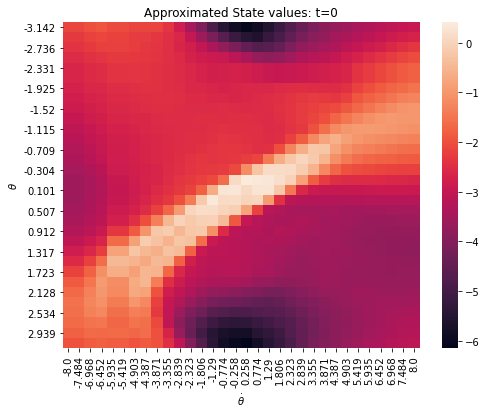

In [14]:
# plot the approximated state values
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = reshape_values(env, v_values)
plot_pendulum_values(env, v_values, vmin=vmin, vmax=vmax, title="Approximated State values: t=0")

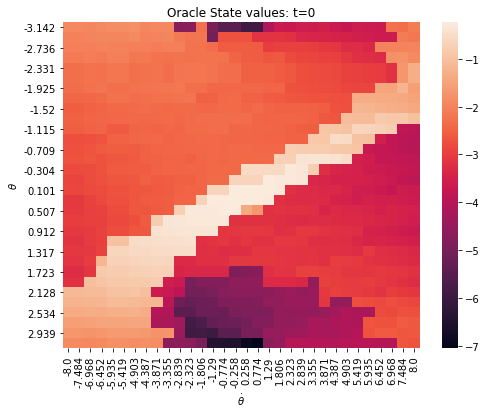

In [16]:
# plot the oracle state values

values = solver.compute_action_values(policy)
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = reshape_values(env, v_values)
plot_pendulum_values(env, v_values, vmin=vmin, vmax=vmax, title="Oracle State values: t=0")

# Plot Learning Curve

You can record the scalar values with ``record_scalar`` function (See [debug_rl/solvers/base.py](../debug_rl/solvers/base.py)).
All recorded scalars are stored in ``history`` dictionary.

Text(0.5, 1.0, 'Performance')

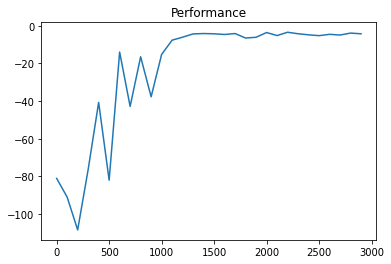

In [17]:
performance = solver.history["Return mean"]
plt.plot(performance["x"], performance["y"])
plt.title("Performance")

Text(0.5, 1.0, 'Q MSE')

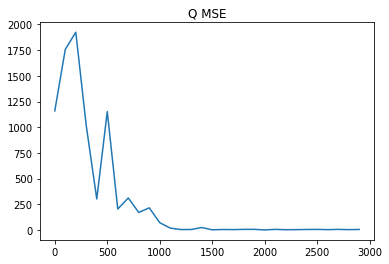

In [18]:
q_error = solver.history["Q error"]
plt.plot(q_error["x"], q_error["y"])
plt.title("Q MSE")

# Visualization with trains

Moreover, you can view the recorded scalars using [trains](https://github.com/allegroai/trains).
All you need to do is just pass the ``logger`` object at initialization.

![](trains.png)

In [19]:
from trains import Task

In [ ]:
task = Task.init(project_name="Example", task_name="example")
logger = task.get_logger()

In [ ]:
solver = SamplingFittedViSolver(env, solve_options={"num_trains": 3000}, logger=logger)
values = solver.solve()